<a href="https://colab.research.google.com/github/Ishasojitra05/Compiler/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
print(os.listdir('/content'))


['.config', 'archive (2).zip', '.ipynb_checkpoints', 'sample_data']


In [6]:
!unzip "/content/archive (2).zip" -d /content/fashion_mnist_data


Archive:  /content/archive (2).zip
  inflating: /content/fashion_mnist_data/fashion-mnist_test.csv  
  inflating: /content/fashion_mnist_data/fashion-mnist_train.csv  
  inflating: /content/fashion_mnist_data/t10k-images-idx3-ubyte  
  inflating: /content/fashion_mnist_data/t10k-labels-idx1-ubyte  
  inflating: /content/fashion_mnist_data/train-images-idx3-ubyte  
  inflating: /content/fashion_mnist_data/train-labels-idx1-ubyte  


In [7]:
import os
print(os.listdir('/content/fashion_mnist_data'))


['fashion-mnist_test.csv', 'fashion-mnist_train.csv', 't10k-labels-idx1-ubyte', 'train-labels-idx1-ubyte', 'train-images-idx3-ubyte', 't10k-images-idx3-ubyte']


In [9]:
train_df = pd.read_csv('/content/fashion_mnist_data/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion_mnist_data/fashion-mnist_test.csv')


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.6838 - loss: 0.8681 - val_accuracy: 0.8512 - val_loss: 0.4027
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.8316 - loss: 0.4644 - val_accuracy: 0.8720 - val_loss: 0.3477
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.8547 - loss: 0.4039 - val_accuracy: 0.8850 - val_loss: 0.3120
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.8694 - loss: 0.3603 - val_accuracy: 0.8852 - val_loss: 0.3083
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.8761 - loss: 0.3404 - val_accuracy: 0.8970 - val_loss: 0.2801
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8973 - loss: 0.2911
Test Accuracy: 0.89
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Confusion Matrix:
 [[894   1  16  23   4   0  56   0   6   0]
 [  0 973   0  19   4   0   2   0   2   0]
 [ 16   0 850   8  63   0  62   0   1   0]
 [ 16   4  10 894  40   0  36   0   0   0]
 [  0   1  54  19

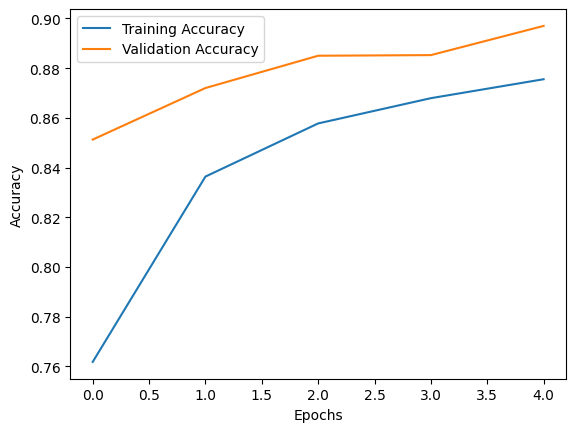

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Dataset Acquisition & Preprocessing
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: CNN Architecture with Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# Step 3: Model Compilation & Training
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Step 4: Evaluation & Performance Metrics
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
